###Задачи 1 и 2

Контрольная работа состоит из пяти вопросов. На каждый вопрос приведено четыре варианта ответа, один из которых правильный. Случайная величина X задаёт число правильных ответов при простом угадывании. Найдите математическое ожидание данной случайной величины. Найдите дисперсию случайной величины X.

Подсказка: постройте закон распределения случайной величины X.

Дискретная величина $X$ принимает следующие значения: $\{0, 1, 2, 3, 4, 5\},$

Количество вопросов: $n = 5,$

Вероятность случайно угадать ответ: $\dfrac{1}{4},$

Для вычисления вероятности каждого дискретного значения используем формулу Бернулли: $P(X=k) = C_n^k \cdot p^k \cdot (1 - p)^{n - k},$

Математическое ожидание и дисперсия данного биномиального распределения: $$M(X) = np, \: D(X) = np(1 - p).$$


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def combinations(n: int, k: int) -> int:
    return np.math.factorial(n) // (np.math.factorial(k) * np.math.factorial(n - k))

N = 5

In [2]:
probs = np.array([])
X = np.arange(N+1)
for k in range(N+1):
    x = combinations(N, k) * np.power(0.25, k) * np.power(0.75, N-k)
    probs = np.append(probs, x)
table = pd.DataFrame({'Value': X, 'Probability': probs})
table.Value = table.Value.astype(np.uint8)
table.transpose()

,0,1,2,3,4,5
Value,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000
Probability,0.237305,0.395508,0.263672,0.087891,0.014648,0.000977


In [3]:
np.sum(table.Probability)  # check if sum of probas == 1

1.0

Распределение $X$:
<table border="3">
    <tr>
        <th>$x$</th>
        <td>$0$</td>
        <td>$1$</td>
        <td>$2$</td>
        <td>$3$</td>
        <td>$4$</td>
        <td>$5$</td>
</tr>
    <tr>
        <th>$P(X=x)$</th>
        <td>$0.237305$</td>
        <td>$0.395508$</td>
        <td>$0.263672$</td>
        <td>$0.087891$</td>
        <td>$0.014648$</td>
        <td>$0.000977$</td>
    </tr>
</table>
					

In [4]:
M = N * 0.25  # expected value
D = N * 0.25 * 0.75  # variance
M, D

(1.25, 0.9375)

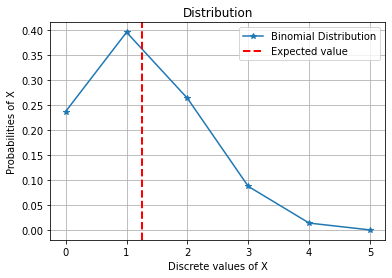

In [91]:
plt.plot(X, probs, label='Binomial Distribution', marker='*')
plt.axvline(M, linestyle='--', color='red', lw=2, label='Expected value')
plt.title('Distribution')
plt.xlabel('Discrete values of X')
plt.ylabel('Probabilities of X')
plt.grid()
plt.legend()
plt.show()

Проверим по общей формуле математического ожидания: $M(X) = \displaystyle \sum_i p_i x_i = p_1 x_1 + p_2 x_2 + \dots $

И по формуле для дисперсии соответственно: $D(X) = M \left( (X - M(X))^2 \right).$

In [6]:
M = sum(p*x for p, x in zip(probs, X))  # expected value
M

1.25

In [7]:
(np.power(X - M, 2) * probs).sum()  # variance

0.9375

###Задача 3

Пользователь получает в среднем 10 писем со спамом на свой почтовый ящик за сутки. Найти число N, такое, что с вероятностью 0.95 пользователь получит не более N писем со спамом за текущий день.

Очевидно, что события описываются распределением Пуассона. Тогда:

$λ = 10, P(X \leq N) = 0.95,$ 

$P(X \leq N) = \displaystyle\sum_{i = 0}^{N} \dfrac{λ^{i} e^{-λ}}{i!} = \displaystyle\sum_{i = 0}^{N} \dfrac{10^{i} e^{-10}}{i!},$

$\leq N$ предусматривает получение от $0$ до $N$ писем в день, поэтому необходимо взять сумму вероятностей по каждой дискретной величине писем

Решить аналитически затруднительно в вычислительном плане, воспользуемся библиотекой $numpy$:

In [8]:
def poisson_proba(k: int, lambda_: float) -> float:
    return (lambda_ ** k) * (np.exp(-lambda_)) / np.math.factorial(k)

In [13]:
probs_sum, n = 0, 0
while round(probs_sum, 2) < 0.95:
    probs_sum = sum(poisson_proba(k=i, lambda_=10) for i in range(n+1))
    n += 1
print(f'User will recieve less or equal {n-1} spam letters with probability of {probs_sum:.2f}.')

User will recieve less or equal 15 spam letters with probability of 0.95.


###Задача 4
Производятся выстрелы по мишени. Вероятность попадания в мишень при одном выстреле равна $0.01$. Сколько выстрелов нужно сделать чтобы быть уверенным с вероятностью $0.9$, что хотя бы $6$ раз будет совершено попадание?

Подсказка: 1) "Вероятность попасть $k$ раз при $n$ выстрелах" - на какое распределение это похоже? 2) $А$ если нам нужна вероятность $P(X >= k)$, а не $P(X = k)$? 3) Здесь предстоит немножко покодить.

В связи с тем, что проводимые выстрелы не зависят друг от друга и вероятность попадания в цель (событие $A$) не меняется от выстрела к выстрелу $(P(A) = 0.01)$, здесь применяется биномиальный закон распределения, описываемый формулой Бернулли: $$P(X = k) = C_n^k p^k (1 - p)^{n - k}$$

По условиям задачи нам необходимо достичь вероятности $0.9$, что не менее $6$ попаданий в течение $n$ выстрелов придутся в цель. Таким образом, при достаточном количестве значений, принимаемых дискретной величиной $X: \{6, 7, 8, ..., k\}$ вероятность $6$ и более попаданий в цель можно записать в виде суммы вероятностей: 

$$ P(X \geq k) = \displaystyle\sum_{k = 6}^{K} C_n^k p^k (1 - p)^{n - k} = 0.9, где K = \{6, 7, 8, ... \}  $$

In [91]:
p = 0.01
for n in range(926, 950):
    prob_sum = sum(combinations(n, k) * np.power(p, k) * np.power(1-p, n-k) for k in range(6, 926))
    if prob_sum >= 0.9:
        print(f'It was made {n} shots to achieve probability {prob_sum:.3f} of striking the target at least 6 times')
        break

It was made 926 shots to achieve probability 0.900 of striking the target at least 6 times


Для проверки рассмотрим обратную ситуацию. Представим, что мы сделали $n=926$ выстрелов, тогда вероятность того, что за $n$ выстрелов мы попадем цель менее $5$ раз должна составить: $P(X \geq k) = 1 - P(X \lt k)$

Тогда $P(X \lt k = 5) = \displaystyle\sum_{k = 0}^{5} C_n^k p^k (1 - p)^{n - k} = 0.1$

In [80]:
N = 926
P_ = sum(combinations(N, i) * np.power(p, i) * np.power(1-p, N-i) for i in range(6))
round(P_, 3)

0.1

In [81]:
prob_sum + P_

0.999999999999992

Ответ $925$ красивее, чем $926$, но при $925$ выстрелах вероятность при $k \geq 6$ не дотягивает до $0.9$ на пару десятитысячных. И напротив, для $k < 6$ вероятность незначительно превосходит $0.1$